XK医疗模型

注意：在“修改”里边把笔记本设置改为GPU

切换运行时会清空之前的数据，可能需要重新上传

GPU额度（每次连续12个小时，下次是12个小时之后）




In [1]:
!ls .

sample_data


In [2]:
!git clone https://github.com/dst1213/xk_llama_med.git

Cloning into 'xk_llama_med'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 86 (delta 14), reused 29 (delta 9), pack-reused 49
Unpacking objects: 100% (86/86), 61.70 MiB | 8.56 MiB/s, done.
Updating files: 100% (48/48), done.


In [3]:
import os
os.chdir("xk_llama_med")

In [4]:
!pip install -r ./requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/peft.git to /tmp/pip-req-build-xywi9e1o
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/peft.git /tmp/pip-req-build-xywi9e1o
  Resolved https://github.com/huggingface/peft.git to commit b1059b73aab9043b118ff19b0cf96263ea86248a
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-kdipdbvd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-kdipdbvd
  Resolved https://github.com/huggingface/transformers.git to commit dbc12269ed5546b2da9236b9f1078b95b6a4d3d5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... 

In [5]:
!ls .

assets				 infer_literature.py	   other
data				 infer.py		   README.md
data-literature			 LICENSE		   requirements.txt
export_hf_checkpoint.py		 llama_model_huatuo.ipynb  scripts
export_state_dict_checkpoint.py  lora-alpaca-med	   templates
finetune.py			 lora-alpaca-med-alldata   utils
generate.py			 lora-llama-literature
infer_api.py			 lora-llama-med


In [6]:
#基于医学知识库，这一步必须执行，会自动下载llama模型！！！
#golden output是正确的标签，model output是模型预测的结果，两者可以对比评估模型效果
!bash ./scripts/infer.sh   # 先改一下--load_8bit True \，不然CUDA OOM，这里已经改过了，第一次会自动下载llama模型

2023-05-08 08:47:29.987220: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/

In [ ]:
#基于医学文献（可选）
#单轮，除了要加8bit还要把"""去掉，sh不支持"""
!bash ./scripts/infer-literature-single.sh


2023-05-08 06:07:24.791177: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/

In [ ]:
#基于医学文献（可选）
#多轮，除了要加8bit还要把"""去掉，sh不支持"""
!bash ./scripts/infer-literature-multi.sh

In [ ]:
# 文件测试（可选）
!bash ./scripts/test.sh

ori
./scripts/test.sh: line 29: infer_result/o_tmp.txt: No such file or directory
alpaca
./scripts/test.sh: line 31: infer_result/a_tmp.txt: No such file or directory
med
./scripts/test.sh: line 33: infer_result/m_tmp.txt: No such file or directory


In [28]:
#基于医学知识库，这一步必须执行，会自动下载llama模型！！！
#golden output是正确的标签，model output是模型预测的结果，两者可以对比评估模型效果
!bash ./scripts/infer.sh   # 先改一下--load_8bit True \，不然CUDA OOM，这里已经改过了，第一次会自动下载llama模型

2023-05-08 09:46:54.314458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/

界面操作如图所示：
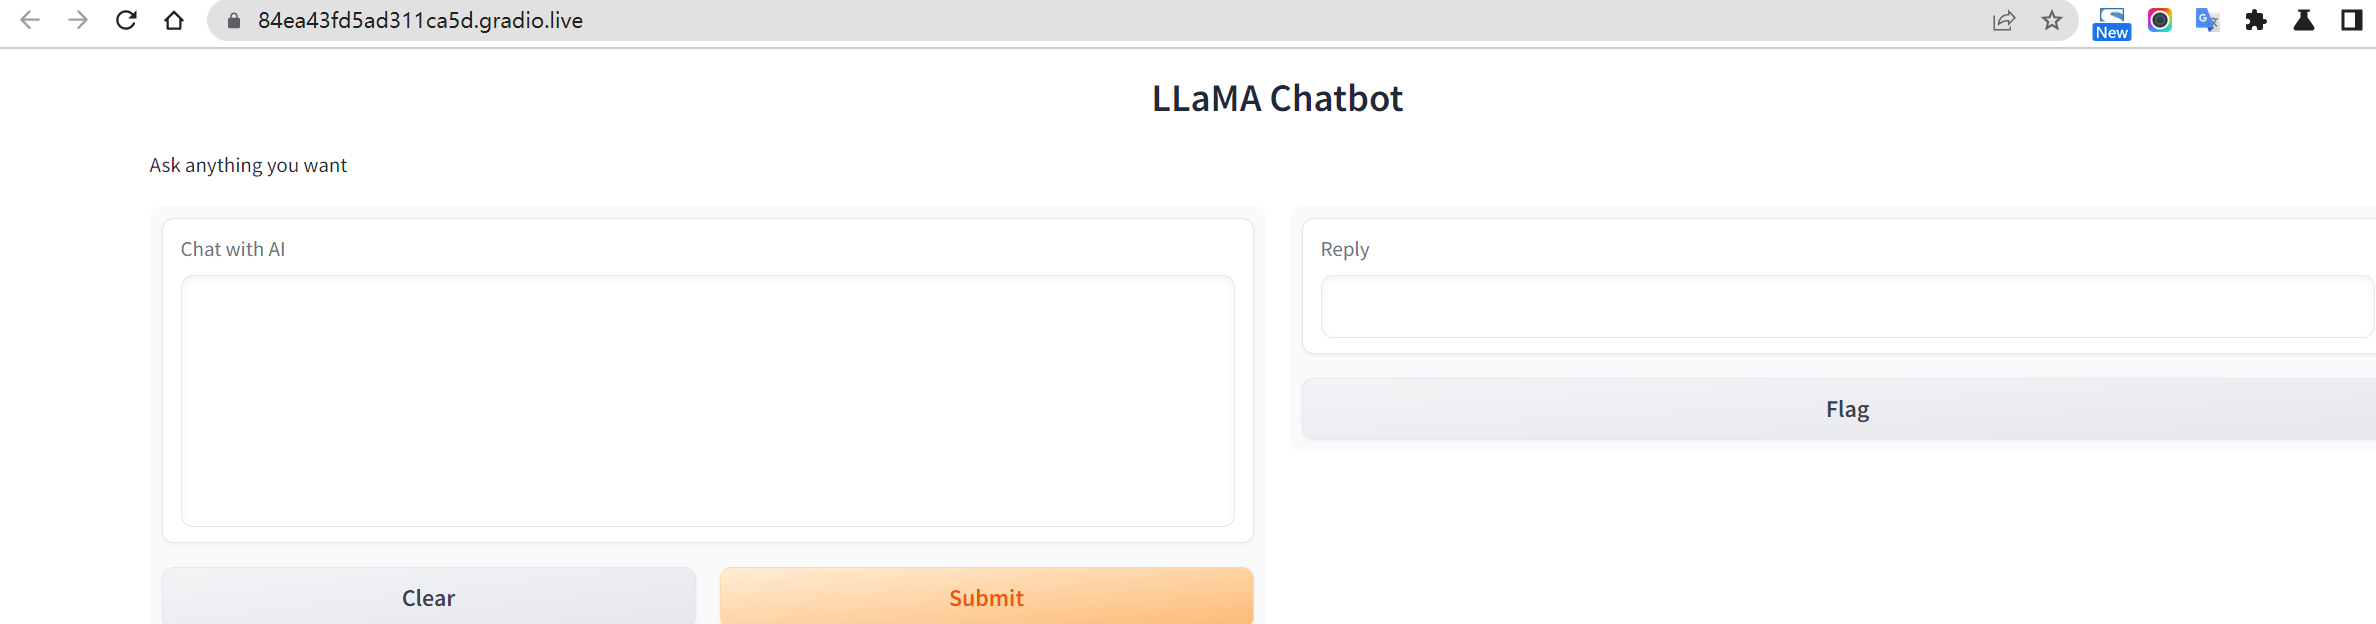

In [ ]:
# 界面操作（可选，建议使用）
# 点击链接即可在界面使用模型。Running on public URL: https://xxxxx.gradio.live
# 注意：只管3天，This share link expires in 72 hours
!python infer_api.py

2023-05-08 10:11:44.111485: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:145: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/

In [34]:
# 关闭界面调试
import gradio
gradio.close_all()

Closing server running on port: 5000


In [ ]:
# 推理接口（单次接口，批量的参考infer.py main函数内的infer_from_json函数）
from infer_api import *

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

using lora ./lora-llama-med
Response: 肝癌的症状包括肝功能衰竭、血小板降低等。


'肝癌的症状包括肝功能衰竭、血小板降低等。'

In [ ]:
res = api(q="肝癌有哪些症状？")
res

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'LLaMATokenizer'. 
The class this function is called from is 'LlamaTokenizer'.


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 1>:1                                                                              │
│                                                                                                  │
│ /content/xk_llama_med/infer_api.py:5 in api                                                      │
│                                                                                                  │
│    2 import gradio as gr                                                                         │
│    3                                                                                             │
│    4 def api(q="肝癌有哪些症状？"):                                                              │
│ ❱  5 │   res = main(load_8bit=True, base_model='decapoda-research/llama-7b-hf', lora_weights=    │
│    6 │   │    instruct_dir='./data/infer.json', prompt_template='med_template',use_instant=Tr    │
│    7 │   return res                                                                              │
│    8                                                                                             │
│                                                                                                  │
│ /content/xk_llama_med/infer.py:41 in main                                                        │
│                                                                                                  │
│    38 ):                                                                                         │
│    39 │   prompter = Prompter(prompt_template)                                                   │
│    40 │   tokenizer = LlamaTokenizer.from_pretrained(base_model)                                 │
│ ❱  41 │   model = LlamaForCausalLM.from_pretrained(                                              │
│    42 │   │   base_model,                                                                        │
│    43 │   │   load_in_8bit=load_8bit,                                                            │
│    44 │   │   torch_dtype=torch.float16,                                                         │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2730 in from_pretrained   │
│                                                                                                  │
│   2727 │   │   │   │   │   key: device_map[key] for key in device_map.keys() if key not in modu  │
│   2728 │   │   │   │   }                                                                         │
│   2729 │   │   │   │   if "cpu" in device_map_without_lm_head.values() or "disk" in device_map_  │
│ ❱ 2730 │   │   │   │   │   raise ValueError(                                                     │
│   2731 │   │   │   │   │   │   """                                                               │
│   2732 │   │   │   │   │   │   Some modules are dispatched on the CPU or the disk. Make sure yo  │
│   2733 │   │   │   │   │   │   the quantized model. If you want to dispatch the model on the CP  │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: 
                        Some modules are dispatched on the CPU or the disk. Make sure you have enough GPU RAM to 
fit
                        the quantized model. If you want to dispatch the model on the CPU or the disk while keeping
                        these modules in 32-bit, you need to set `load_in_8bit_fp32_cpu_offload=True` and pass a 
custom
                        `device_map` to `from_pretrained`. Check
                        https://huggingface.co/docs/transformers/main/en/main_classes/quantization#offload-between-
cpu-and-gpu
                        for more details.